In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import urllib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
iris = datasets.load_iris()
digits = datasets.load_digits()

In [4]:
# print(iris.DESCR)
# print(iris.data[0])
# print(iris.data.shape)
# print(iris.feature_names)
# print(iris.target)
# print(iris.target.shape)
print(iris.target_names)
# print(type(iris.data))
print(digits.data)
print(digits.target)

['setosa' 'versicolor' 'virginica']
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


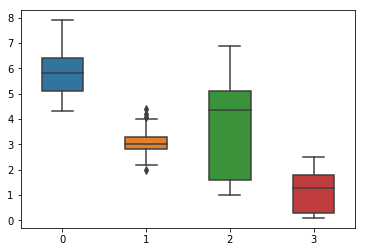

In [5]:
 
iris_data = iris.data
iris_target = iris.target
bplot = sns.boxplot(data = iris_data, width=0.5, fliersize=5)
sns.set(rc={'figure.figsize':(1,10)})
bplot

In [6]:
iris_test_ids = np.random.permutation(len(iris_data)) #randomly splitting the data set
# splitting and leaving last 15 entries for testing, rest for training
iris_train_one = iris_data[iris_test_ids[:-15]]
iris_test_one = iris_data[iris_test_ids[-15:]]
iris_train_two = iris_target[iris_test_ids[:-15]]
iris_test_two = iris_target[iris_test_ids[-15:]]
iris_classify = tree.DecisionTreeClassifier() # using the decision tree for classification
iris_classify.fit(iris_train_one, iris_train_two) # training or fitting the classifier using the training set
iris_predict = iris_classify.predict(iris_test_one) # making predictions on the test dataset

print(iris_predict) # lables predict (flower species)
print(iris_test_two) # actual label
print(accuracy_score(iris_predict, iris_test_two)*100) #accuracy metric

[2 1 0 1 1 0 1 2 1 2 1 2 0 1 0]
[1 1 0 1 1 0 1 2 1 2 1 2 0 1 0]
93.33333333333333


In [7]:
colors = list()
palette = {0: 'red', 1: 'green', 2: 'blue'}

In [8]:
for c in np.nditer(iris.target):
    colors.append(palette[int(c)])
    dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)

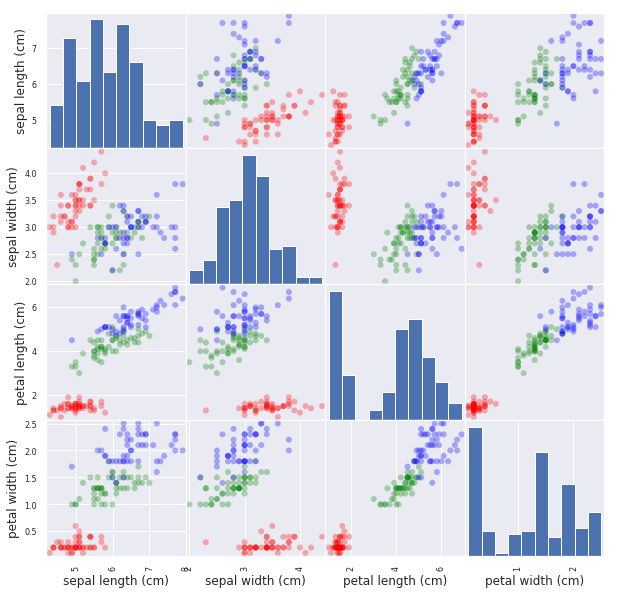

In [9]:
sc = pd.plotting.scatter_matrix(dataframe, alpha=0.3, figsize=(10,10),
                      diagonal='hist', color=colors, marker='o', grid=True)

In [10]:
url = "http://aima.cs.berkeley.edu/data/iris.csv"
set1 = urllib.request.Request(url)
iris_p = urllib.request.urlopen(set1)
iris_other = pd.read_csv(iris_p, sep=',', decimal='.', header=None, 
                          names=['sepal_lenght', 'sepal_width', 'petal_length', 'petal_width','class'])

iris_other.head()

,sepal_lenght,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
iris_other.tail()

,sepal_lenght,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [12]:
iris_other.columns # returns not a list but index of pandas libraries

Index(['sepal_lenght', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [13]:
Y = iris_other['class']
Y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

In [14]:
X = iris_other[['sepal_lenght', 'sepal_width']]
X

,sepal_lenght,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [15]:
print(X.shape)

(150, 2)


In [16]:
print(Y.shape)

(150,)


In [17]:
print(iris_other.describe())

       sepal_lenght  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [18]:
print(iris_other.groupby('class').size())

class
setosa        50
versicolor    50
virginica     50
dtype: int64


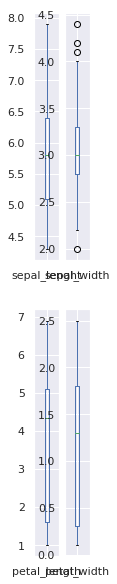

In [19]:
iris_other.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
bplot

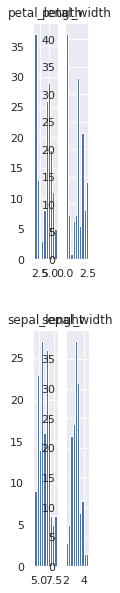

In [20]:
iris_other.hist()
plt.show()

In [ ]:
# Create a Validation Dataset
